# K-Nearest Neighbours (KNN)

You are provided with a dataset of shape (1000, 10), where each row represents a pair of an end-effector position and its corresponding joint angles. Each row consists of:

(1) The first 3 dimensions: robot end-effector position (x, y, z)
(2) The last 7 dimensions: corresponding robot joint angles (7-DOF robot arm)

Answer the question below:

Given a new end-effector position (-0.18067622, -0.18449534, 1.61964518), use KNN to predict its corresponding joint angles (i.e., solving the inverse kinematics problem)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

The dataset include 1000 samples/trajectories


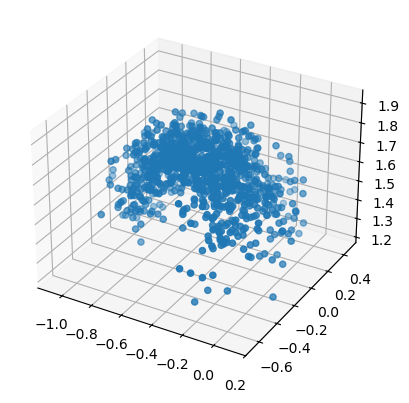

In [27]:
data = np.load("data.npy")
eef_position = data[..., 0:3]   # x, y, z coordinates
joint_angles = data[..., 3:]    # joint angles for a seven degree of freedom robot
print("The dataset include {} samples/trajectories".format(len(data)))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(eef_position[:, 0], eef_position[:, 1], eef_position[:, 2])
plt.show()

In [29]:
X = eef_position
y = joint_angles

In [31]:
#Function to calculate Euclidean Distance
def euclidean_distance(point1, point2):
    distance = 0.0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i]) ** 2
    return np.sqrt(distance)

#Implementation of KNN Algorithm
def knn_predict(X, y, new_eef, k):
    distances = []
    for idx, train_row in enumerate(X):
        dist = euclidean_distance(new_eef, train_row) #compare distances of dataset eef to new eef
        distances.append((idx, dist))
    distances.sort(key=lambda x: x[1])
    neighbours = distances[:k] 

    weighted_sum = [0.0] * 7
    total_weight = 0.0
    epsilon = 1e-5
    for idx, dist in neighbours:
        weight = 1.0/(dist + epsilon)
        joint_angles = y[idx]
        for j in range(7):
            weighted_sum[j] += joint_angles[j] * weight
        total_weight += weight

    predicted = [angle/total_weight for angle in weighted_sum]
    return predicted

In [33]:
new_eef_pos = np.array([-0.18067622, -0.18449534, 1.61964518]) # desired end-effector position

# TODO: write your code here, implement KNN to solve the inverse kinematics problem.

k = 100
predicted_angles = knn_predict(X,y,new_eef,k)
print('Predicted angle:', predicted_angles)

Predicted angle: [-0.24455454363297943, 0.5618882491168772, 0.03436607216638126, -0.15958692386860157, -0.11296585000191443, -0.11983550514580694, 0.14932560888564345]


In [35]:
k_values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50,60,75,100,110,120,130,140,150,160,170,200] # 2 ,4, 6, 8, 10, 12, 14,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180
errors=[]
errors_v2 = []
actual_angle = np.array([-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905])

for k in k_values:
    predicted_angle = knn_predict(X,y,new_eef,k)
        
    mse = np.mean((actual_angle - predicted_angle) ** 2) #for mse
    errors.append(mse)

    rmse = np.sqrt(np.mean((predicted_angle - actual_angle) ** 2)) # for rmse
    errors_v2.append(rmse)

    print(f"K={k}: MSE={mse:.4f}")
    print(f"K={k}: MSE={rmse:.4f}")
    print('Predicted joint angle:', predicted_angle)
    print('-')

K=1: MSE=0.1008
K=1: MSE=0.3175
Predicted joint angle: [-0.21510978515472923, 0.6331988789431541, -0.12173018285956316, -0.24611114115018487, -0.07464042866078713, -0.39724425167171584, 0.49521876035250223]
-
K=2: MSE=0.0410
K=2: MSE=0.2024
Predicted joint angle: [-0.23920802662647223, 0.638240042933114, 0.1549233095800731, -0.1733111339638241, -0.15574574686716045, -0.35288389692580235, 0.5373482777930855]
-
K=3: MSE=0.0321
K=3: MSE=0.1792
Predicted joint angle: [-0.2390372003316408, 0.635165423043612, 0.2255630785690678, -0.1815565904789423, -0.1451289469337666, -0.3587012895538248, 0.5843762498309951]
-
K=4: MSE=0.0324
K=4: MSE=0.1801
Predicted joint angle: [-0.23417932765429256, 0.6034514515809917, 0.24073636621256594, -0.20210142460462946, -0.20944763374162773, -0.29055238904681774, 0.4392537703047592]
-
K=5: MSE=0.0431
K=5: MSE=0.2075
Predicted joint angle: [-0.22908938295290754, 0.5948965201916498, 0.1681887846420987, -0.2617538460193929, -0.22899857898416762, -0.326403294615023

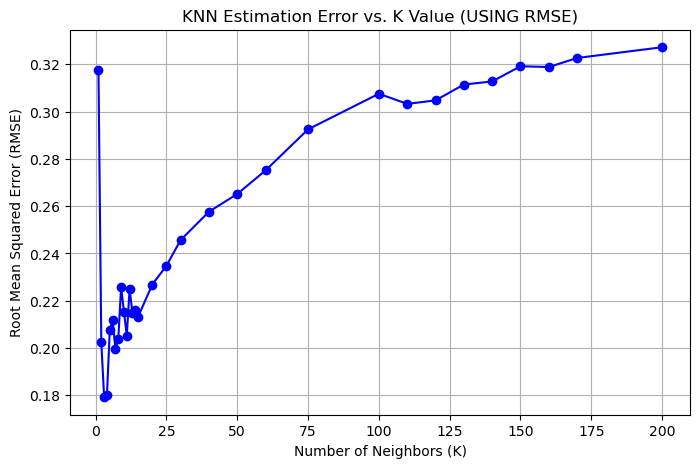

In [37]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, errors_v2, marker='o', linestyle='-', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.title("KNN Estimation Error vs. K Value (USING RMSE)")
plt.grid()
plt.show()

## Discussing the results

For the given end-effector position (-0.18067622, -0.18449534, 1.61964518), the actual joint angles are (-0.28158251, 0.64710445, 0.64139232, -0.0452992, -0.29836178, -0.27488041, 0.61142905).

Experiment with different values of K and evaluate their performance. Then, analyze and discuss your findings in the report. You do not need to write code for this section—focus on interpreting and explaining the results in your discussion.